In [70]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import glob
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# TCGA dictionary information
tcga_dict = open("./data/tcga_dictionaries.txt","r")
dict_name_index = 0 #Set dictionary index counter to 0
for line in tcga_dict:
    if line.startswith("#"): #If line starts with #, the next line will be a known dictionary
        dict_name_index += 1
    elif dict_name_index == 5:
        code_to_disease = eval(line)

In [11]:
def getDataAndLabels(name, features):
    labels_string = features.cancer_type
    le            = preprocessing.LabelEncoder()
    labels        = le.fit_transform(labels_string)

    # Get rid of the cancer type and patient_id columns 
    data = features[features.columns[3:]]
    return {'name': name, 'feature_size': data.shape[1],
            'data': data, 'labels': labels , 'label_encoder': le }

In [12]:
print('Loading training data ...')

train_files = glob.glob("./data/features_*.train.csv")
all_train_data = {}
for filename in train_files:
    
    name = filename[16:-10]
    print(" ", name)
    train_features = pd.read_csv(filename)
    all_train_data[name] = getDataAndLabels(name, train_features)

print("done.")

Loading training data ...
  l1reg_c1
  l1reg_c100
  l1reg_c0.5
  l1reg_c10
  topgenes_small
  bestfit_med
  bestfit_large
  all
  bestfit_with_topgenes
done.


In [13]:
# pull out a dataset to work with
# let's start with the full set for PCA
train      = all_train_data['all']
X_train    = train['data']
Y_train    = train['labels']

In [68]:
def cancer_analysis(c_type):
    data = X_train[Y_train == c_type]
    #data = data.drop(columns='index', axis=1)
    data = data.reset_index()
    gene_cnt_list = []
    image_index = -1
    max_count = 0
    for index, item in enumerate(data.iterrows()):
        s = np.sum(item[1])
        if s > max_count:
            max_count = s
            image_index = index
        gene_cnt_list.append(np.sum(item[1]))
    print("Cound %d at index %d\n" %(max_count,image_index))
    ser = pd.Series(gene_cnt_list)
    ser.plot.hist(grid=True, bins=20)
    return data

Cound 7304 at index 25



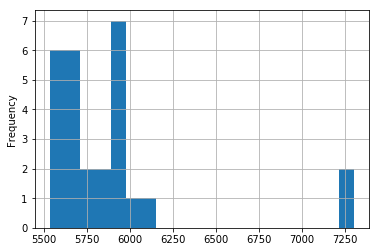

In [69]:
data = cancer_analysis(6)

In [41]:
a=[]
for item in gbm_data.iterrows():
    a.append(np.array(item[1]))

In [42]:
images = []
for i in range(len(a)):
    a[i] = a[i][:8100]
    p = a[i].reshape(90,90)
    images.append(p)

In [43]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

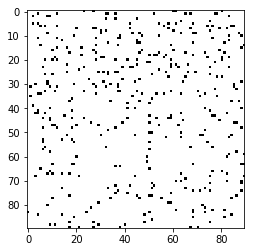

In [44]:
plt.imshow(images[0], cmap = mpl.cm.binary)
plt.show()

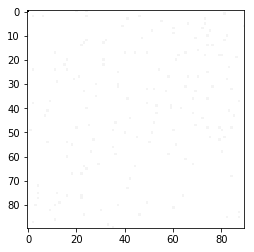

In [54]:
plt.figure(figsize=(4,4))
plt.imshow(images[22], cmap = mpl.cm.binary)
plt.show()

In [82]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.025, hspace=0.05)  # set the spacing between axes.

<Figure size 1440x1440 with 0 Axes>

In [25]:
print('Loading test data ...')
data = pd.read_csv("./data/features_topgenes_small.train.csv") 
print('..done')

Loading test data ...
..done


In [29]:
labels = data['cancer_type']

In [31]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [38]:
cancer_labels = labels.unique()

In [36]:
le.classes_

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA',
       'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 'LGG', 'LIHC', 'LUAD',
       'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC',
       'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM'],
      dtype=object)

In [37]:
X = data.drop(['Unnamed: 0', 'case_id', 'cancer_type'], axis=1)

In [19]:
X.head()

,A1BG,A1CF,A2M,A2ML1,AACS,AADACL2,AADACL4,AAK1,AASDH,AASS,...,ZSCAN22,ZSCAN29,ZSWIM3,ZSWIM6,ZSWIM8,ZUFSP,ZW10,ZXDB,ZYG11B,ZZEF1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.manifold import TSNE

In [21]:
X_dense = TSNE(n_components=2).fit_transform(X)

In [22]:
X_dense.shape

(8006, 2)

In [24]:
X_dense[:10]

array([[ 4.5466156e+00, -1.7806059e+01],
       [ 1.2824901e+01, -1.3518683e+01],
       [ 1.1444931e+01, -4.8640275e+00],
       [ 1.6964451e+01, -1.2821941e+01],
       [ 1.0643703e+01,  5.3777499e+00],
       [-6.6460574e-01,  3.1213051e+01],
       [ 1.0311205e+01, -1.0014319e+01],
       [ 6.4247626e-01, -5.4384480e+00],
       [ 1.0010792e+01,  2.6986100e-02],
       [-1.0446943e+01,  8.9935827e+00]], dtype=float32)

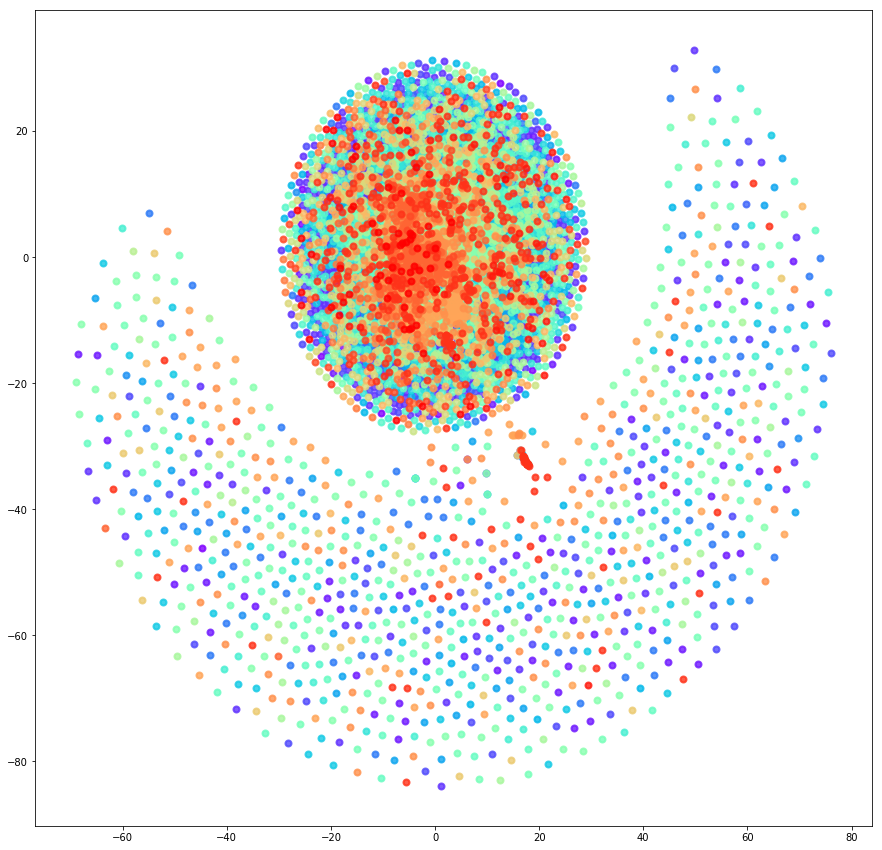

In [62]:
N = len(cancer_labels)
plt.figure(figsize=(15,15))
colors = mpl.cm.rainbow(np.linspace(0, 1, N))
counter = np.arange(N)
lw = 2

for color, i, target_name in zip(colors, counter, le.classes_):
    plt.scatter(X_dense[Y == i, 0], X_dense[Y == i, 1],
                color=color, alpha=.8, lw=lw)
                    
    #plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

In [65]:
adb_clf.fit(X, Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=42)

In [74]:
print('Loading test data ...')
test_data = pd.read_csv("./data/features_topgenes_small.test.csv") 
print('..done')

Loading test data ...
..done


In [75]:
test_labels = le.transform(test_data['cancer_type'])

In [76]:
test_data = test_data.drop(['Unnamed: 0', 'case_id', 'cancer_type'], axis=1)

In [77]:
adb_pred = adb_clf.predict(test_data)

In [78]:
metrics.accuracy_score(test_labels, adb_pred)

0.24525474525474525

In [82]:
metrics.confusion_matrix(test_labels, adb_pred)

array([[  0,   0,  14, ...,   1,   0,   0],
       [  0,   0,  26, ...,   3,   0,   0],
       [  0,   0, 115, ...,   5,   0,   1],
       ...,
       [  0,   0,   6, ...,  57,   0,   5],
       [  0,   0,   1, ...,   2,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [84]:
print(metrics.classification_report(test_labels, adb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        89
           2       0.15      0.57      0.24       200
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        11
           5       0.34      0.60      0.43        70
           6       0.44      0.70      0.54        10
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00        79
           9       0.00      0.00      0.00       108
          10       0.00      0.00      0.00        17
          11       0.83      0.54      0.66        74
          12       0.00      0.00      0.00        61
          13       0.80      0.75      0.78        93
          14       0.00      0.00      0.00        76
          15       0.21      0.04      0.07        91
          16       0.13      0.03      0.05       109
          17       0.00    

In [85]:
cancer_labels[0]

'GBM'

In [91]:
gbm_data = X[data['cancer_type'] == 'GBM']

In [93]:
gbm_dense = TSNE(n_components=2).fit_transform(gbm_data)

In [94]:
gbm_dense.shape

(311, 2)

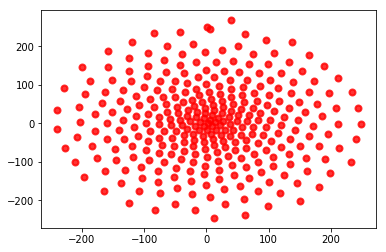

In [96]:
plt.figure()
plt.scatter(gbm_dense[:,0], gbm_dense[:,1], color='red', alpha=.8, lw=lw)
plt.show()

In [97]:
cancer_labels[13]

'SARC'

In [98]:
sarc_data = X[data['cancer_type'] == cancer_labels[13]]
sarc_dense = TSNE(n_components=2).fit_transform(sarc_data)

In [100]:
sarc_dense.shape

(184, 2)

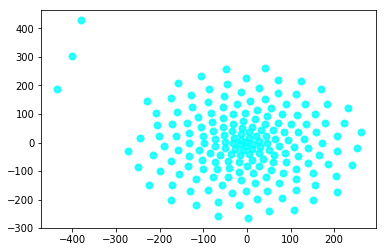

In [101]:
plt.figure()
plt.scatter(sarc_dense[:,0], sarc_dense[:,1], color='cyan', alpha=.8, lw=lw)
plt.show()

In [102]:
cancer_labels[11]

'LIHC'

In [103]:
lihc_data = X[data['cancer_type'] == cancer_labels[11]]
lihc_dense = TSNE(n_components=2).fit_transform(lihc_data)

In [104]:
lihc_dense.shape

(287, 2)

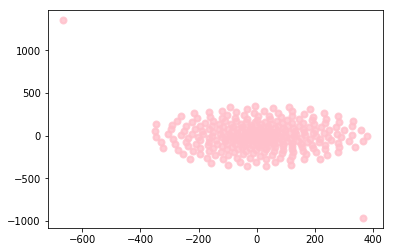

In [105]:
plt.figure()
plt.scatter(lihc_dense[:,0], lihc_dense[:,1], color='pink', alpha=.8, lw=lw)
plt.show()

In [106]:
cancer_labels[29]

'ACC'

In [107]:
acc_data = X[data['cancer_type'] == cancer_labels[29]]
acc_dense = TSNE(n_components=2).fit_transform(acc_data)

In [108]:
acc_dense.shape

(72, 2)

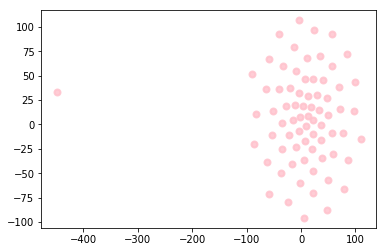

In [109]:
plt.figure()
plt.scatter(acc_dense[:,0], acc_dense[:,1], color='pink', alpha=.8, lw=lw)
plt.show()

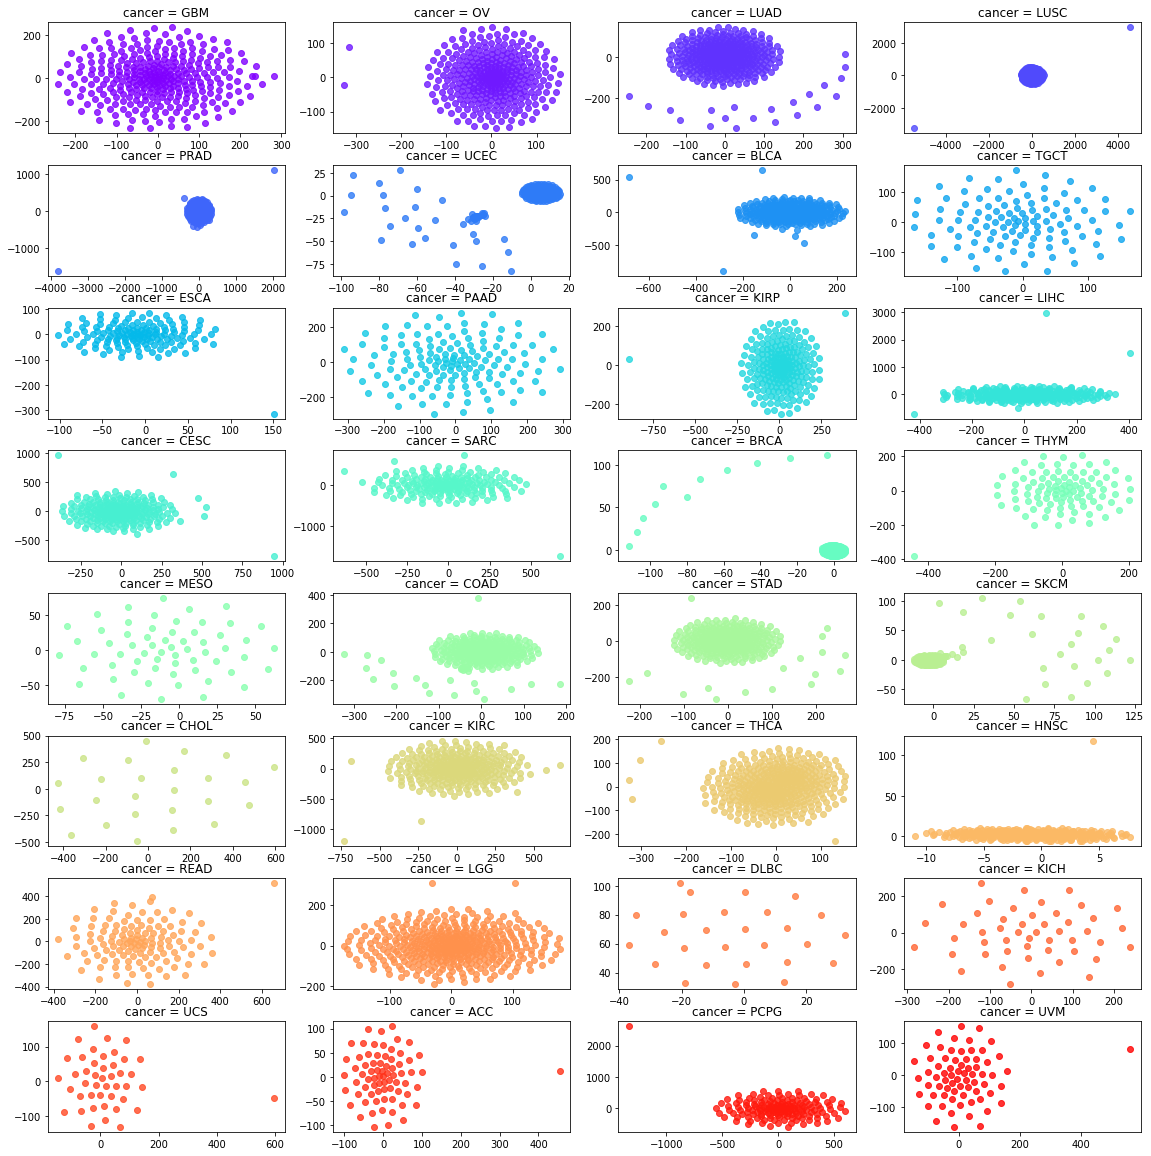

In [118]:
N = len(cancer_labels)
colors = mpl.cm.rainbow(np.linspace(0, 1, N))
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(16, 16))
plt.tight_layout()

for i, ax in enumerate(axes.flat):
    ax.title.set_text("cancer = {}".format(cancer_labels[i]))
    d = X[data['cancer_type'] == cancer_labels[i]]
    dd = TSNE(n_components=2).fit_transform(d)
    ax.scatter(dd[:,0], dd[:,1], color=colors[i], alpha=.8)